# Assignment 10 B

## Imports

In [117]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Prep

In [43]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [44]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [45]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [93]:
print(data.std())
variation_value = data.std().tolist()[:-1]

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64


In [94]:
variation_value

[488.19503543233304, 10403.417325366105, 2.9266616724509307]

In [47]:
x_train=data[['f1','f2','f3']].values
y_train=data['y'].values
print(x_train.shape)
print(y_train.shape)

(200, 3)
(200,)


In [48]:
np.unique(y_train)

array([0., 1.])

## Objective: What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<b><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></b>

In [49]:
hyperparam_list = [0.001, 1, 100]

### Task1

#### Apply Logistic Regression

In [50]:
## Logistic Regression

non_standrd_results = []
for ind, param in enumerate(hyperparam_list):
    print('Hyperparameter = {}'.format(param))
    clf = SGDClassifier(loss='log',alpha=param, random_state=42)
    clf.fit(x_train, y_train)
    print(clf.coef_[0])
    non_standrd_results.append(np.abs(clf.coef_[0]))

Hyperparameter = 0.001
[  928.42803044 -1122.76033708  1166.37055976]
Hyperparameter = 1
[ 0.82107703 -1.0493408   1.18822044]
Hyperparameter = 100
[ 0.00984986 -0.01074521  0.0118282 ]


#### Apply Linear SVM

In [51]:
# SVM
non_standrd_results_svm = []
for param in [0.001, 1, 100]:
    print('Hyperparameter = {}'.format(param))
    clf = SGDClassifier(loss='hinge',alpha=param, random_state=42)
    clf.fit(x_train, y_train)
    print(clf.coef_[0])
    non_standrd_results_svm.append(np.abs(clf.coef_[0]))

Hyperparameter = 0.001
[ 1149.60853255 -1064.77386911  1163.90648999]
Hyperparameter = 1
[ 1.18137149 -1.0941929   1.19606449]
Hyperparameter = 100
[0.01114799 0.00725793 0.01230957]


### Task2

#### Apply Logistic Regression On Standardized Data

In [52]:
# Standardizing the data
std = StandardScaler()
x_train = std.fit_transform(x_train)

In [53]:
## Logistict Regression
results = []
for param in [0.001, 1, 100]:
    clf = SGDClassifier(loss='log',alpha=param, random_state=42)
    clf.fit(x_train, y_train)
    print(clf.coef_[0])
    results.append(np.abs(clf.coef_[0]))

[-0.25528984  0.17163414  5.45803937]
[ 0.01875157 -0.00353376  0.33664917]
[ 3.34037859e-04 -8.87677440e-05  4.18828215e-03]


#### Apply Linear SVM on Standardized Data

In [54]:
# SVM
results_svm = []
for param in [0.001, 1, 100]:
    clf = SGDClassifier(loss='hinge',alpha=param, random_state=42)
    clf.fit(x_train, y_train)
    print(clf.coef_[0])
    results_svm.append(np.abs(clf.coef_[0]))

[-0.29382397 -0.79663131  4.41150327]
[ 0.01415135 -0.00678538  0.64702268]
[ 0.00067226 -0.00017958  0.00839737]


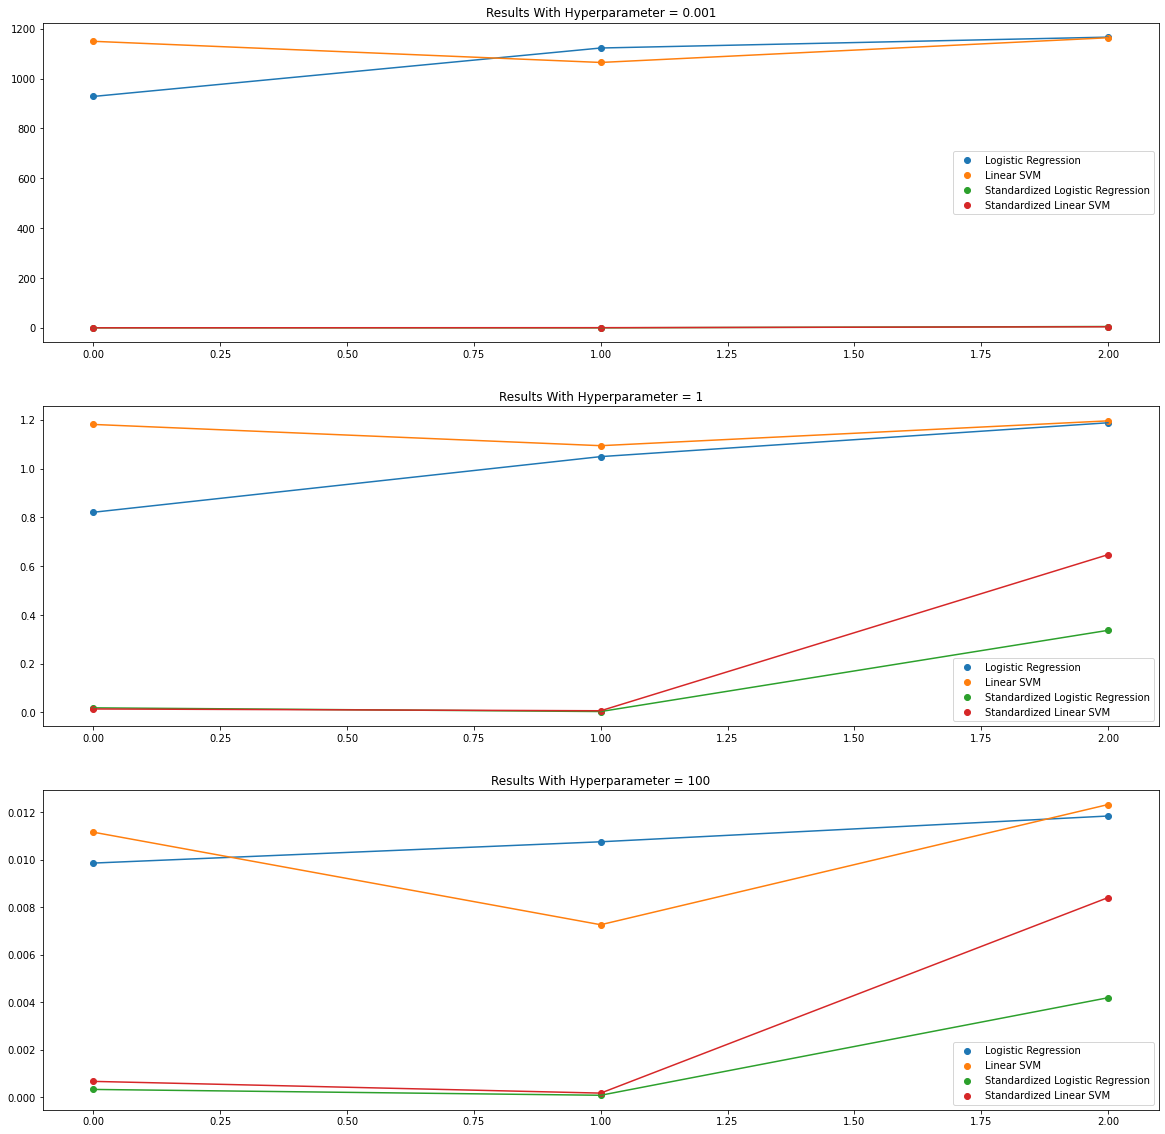

In [69]:
_, ax = plt.subplots(3,1, figsize=(20,20))

for i in range(3):
    ax[i].scatter(y=non_standrd_results[i], x= range(0,3), label='Logistic Regression')
    ax[i].scatter(y=non_standrd_results_svm[i], x=range(0,3), label='Linear SVM')
    ax[i].scatter(y=results[i], x=range(0,3), label='Standardized Logistic Regression')
    ax[i].scatter(y=results_svm[i], x=range(0,3),label='Standardized Linear SVM')
    
    ax[i].plot(non_standrd_results[i])
    ax[i].plot(non_standrd_results_svm[i])
    ax[i].plot(results[i])
    ax[i].plot(results_svm[i])
    ax[i].set_title('Results With Hyperparameter = {}'.format(hyperparam_list[i]))
    ax[i].legend()

__Observations__:

- Due standarization the absolute values of the weight vector is way lower than the non standardized datapoints

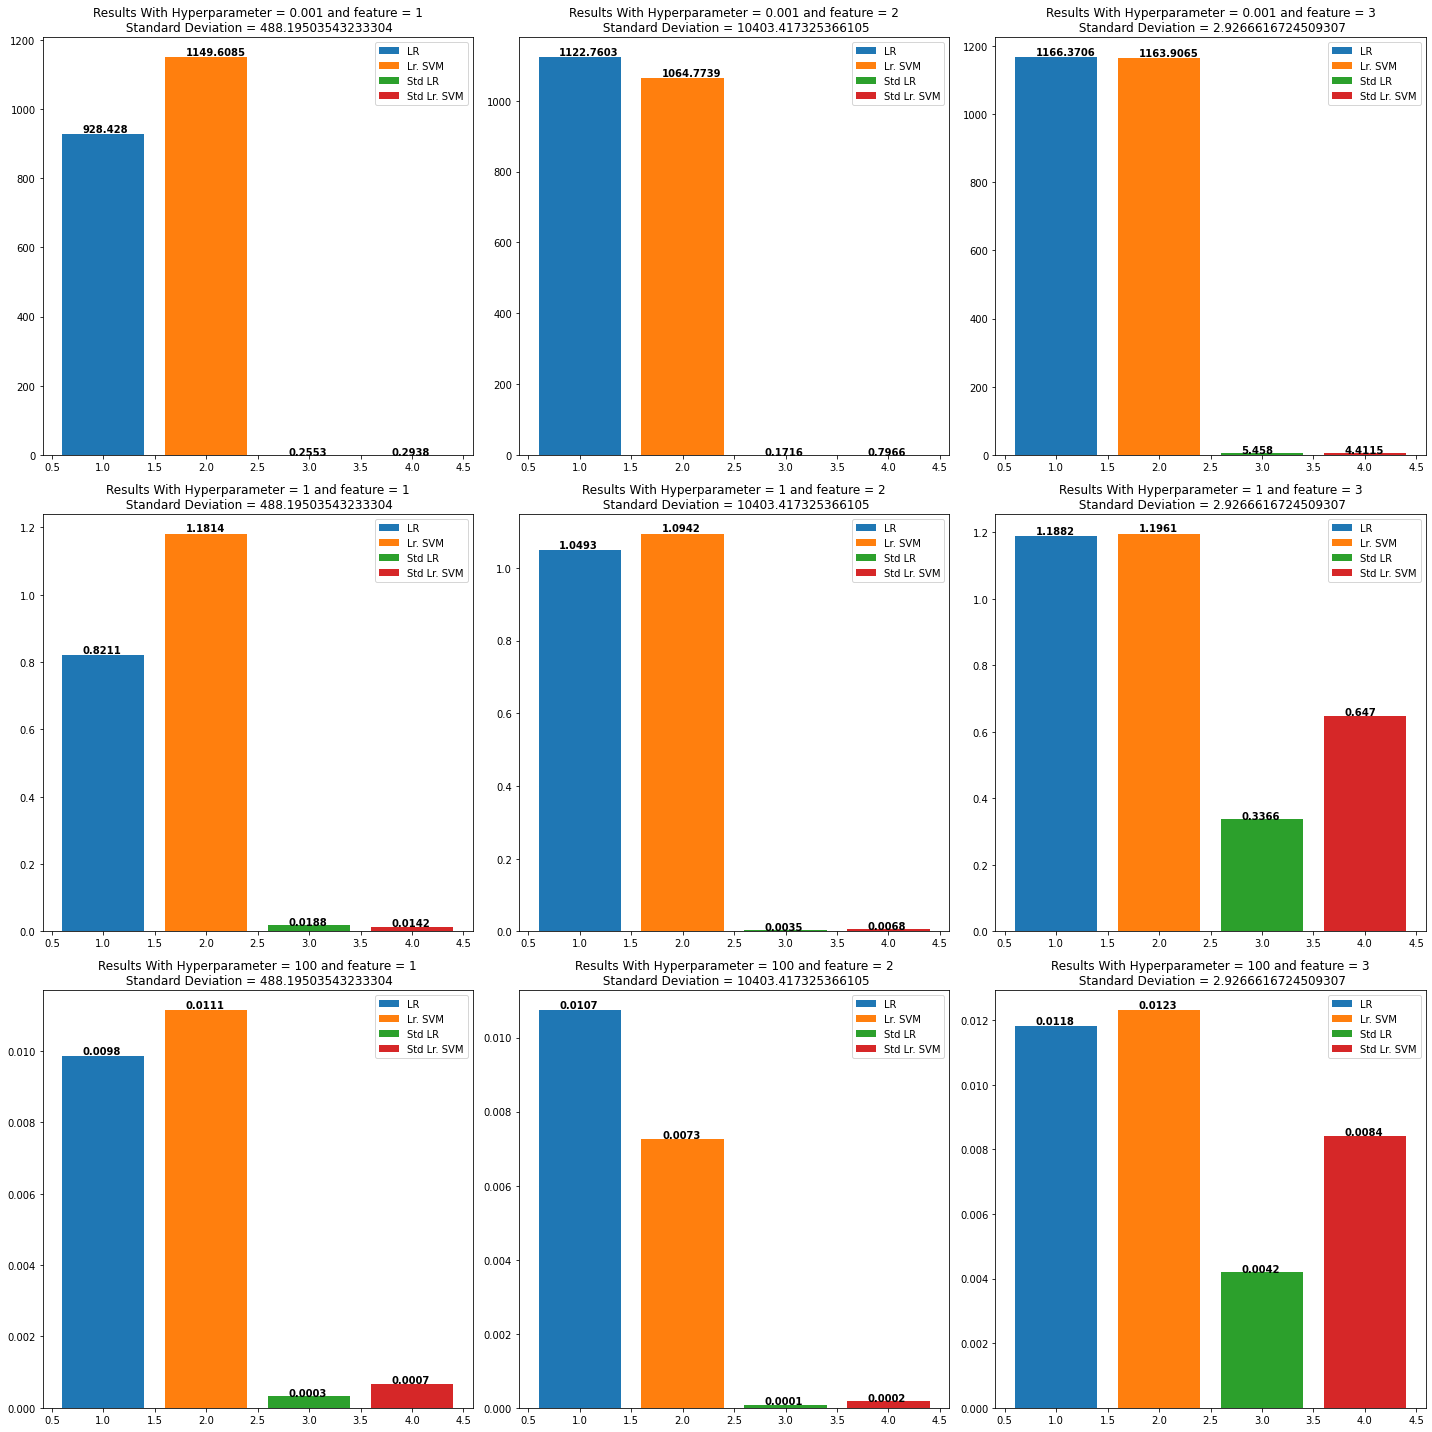

In [112]:
_, ax = plt.subplots(3,3, figsize=(20,20))

for i in range(3):
    for j in range(3):
        ax[i][j].set_title('Results With Hyperparameter = {} and feature = {}\n Standard Deviation = {}'.format(hyperparam_list[i], j+1, variation_value[j]))
        
        ax[i][j].bar(x=1, height=non_standrd_results[i][j], label='LR')
        ax[i][j].text(0.80, non_standrd_results[i][j] + 0.005 * non_standrd_results[i][j] , str(round(non_standrd_results[i][j],4)), color='black', fontweight='bold')
        ax[i][j].bar(x=2, height=non_standrd_results_svm[i][j], label='Lr. SVM')
        ax[i][j].text(1.80, non_standrd_results_svm[i][j] + 0.005 * non_standrd_results_svm[i][j] , str(round(non_standrd_results_svm[i][j],4)), color='black', fontweight='bold')
        ax[i][j].bar(x=3, height=results[i][j], label='Std LR')
        ax[i][j].text(2.80, results[i][j] + 0.005 * results[i][j] , str(round(results[i][j],4)), color='black', fontweight='bold')
        ax[i][j].bar(x=4, height=results_svm[i][j], label='Std Lr. SVM')
        ax[i][j].text(3.80, results_svm[i][j] + 0.005 * results_svm[i][j] , str(round(results_svm[i][j],4)), color='black', fontweight='bold')
        ax[i][j].legend()
        plt.tight_layout()

__Observation__:

- Features Having Least standard deviation have the highest absolute value of the weight vector and vice versa.Which means that the feature which has lesser standard deviation has more importance to the model.

**Question**:

- Reffered to a question on cross validated website <a>https://stats.stackexchange.com/questions/202221/for-linear-classifiers-do-larger-coefficients-imply-more-important-features</a> it has some contradicting answers can you guys clarify
        

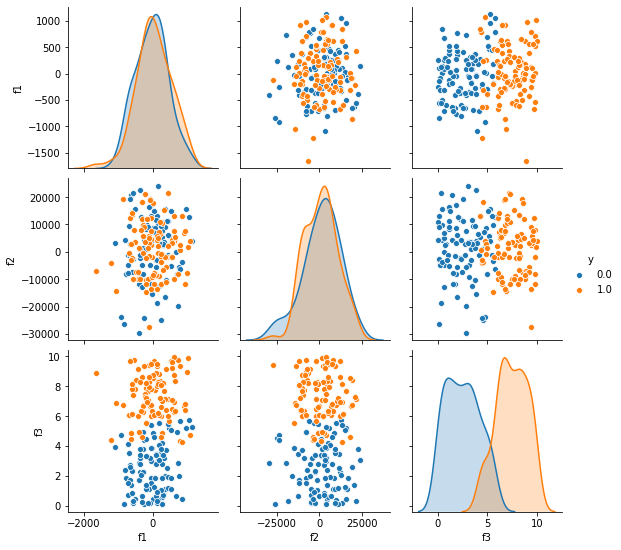

In [130]:
sns.pairplot(data,hue='y')